In [1]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


In [2]:

# Load the dataset
file_path = "/content/Dataset-Sentiment Analysis (Task-ML Engineer).xlsx"
dataset = pd.read_excel(file_path)

# Check the distribution of labels
label_distribution = dataset['sentiment'].value_counts()
print(label_distribution)


sentiment
neutral     45
negative    42
positive    12
Name: count, dtype: int64


In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 17.4 MB/s eta 0:00:00


In [4]:

import emoji



# Dictionary mapping emojis to Bangla words
emoji_to_bangla = {
    "🙏": "অনেক ধন্যবাদ",
    "📵": "মোবাইল নিষিদ্ধ",
    "🤔": "ভেবে দেখা হচ্ছে",
    "❤": "ভালবাসা",
    "☑": "টিক চিহ্ন",
    "🥺": "বিনীতভাবে",
    "🙂": "হাসি মুখ",
    "➖": "ঋণাত্মক",
    "😴": "ঘুম"
}


# Define the punctuation removal function
def remove_punctuations(text):
    # Define the punctuation string for English
    eng_punctuations = r"""!#$%&'()*+,-./:;<=>?@[\]^_{|}~"""

    # Define the punctuation string for Bangla
    bn_punctuations = "".join([chr(c) for c in range(0x0964, 0x0970)])  # Bangla punctuation range

    # Combine English and Bangla punctuations
    punctuations = eng_punctuations + bn_punctuations

    # Remove punctuations from the text
    no_punct = re.sub(rf'[{re.escape(punctuations)}]', '', text)

    return no_punct

# Function to clean text, remove punctuations, and replace emojis with Bangla words
def clean_text_with_bangla_emojis(text):
    # Remove punctuations using the defined function
    text_no_punct = remove_punctuations(text)

    # Remove extra whitespaces
    cleaned_text = re.sub(r'\s+', ' ', text_no_punct).strip()

    # Replace emojis with their Bangla text meaning
    for emj, bangla_word in emoji_to_bangla.items():
        cleaned_text = cleaned_text.replace(emj, bangla_word)

    return cleaned_text

# Apply preprocessing to conversation_text column
dataset['conversation_text'] = dataset['conversation_text'].apply(clean_text_with_bangla_emojis)





In [5]:
dataset

,conversation_text,sentiment
0,companyx এজেন্ট থেকে রং নাম্বারে টাকা গেলে ফের...,neutral
1,companyx গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খবর...,negative
2,companyx গ্রাহকদের জন্য খুবই দুঃখ জনক একটা খবর...,negative
3,banky ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক্...,negative
4,banky ব্যাংক যখন ঘোষনা দিয়েছে যে কার্ড দিয়ে ক্...,negative
...,...,...
94,আমি bankk ব্যাংক ভিসা কার্ড থেকে আমার companyx...,negative
95,একটা companyx নাম্বার কোন এন আই ডি নাম্বার থেক...,neutral
96,খুবইজরুরীHelpপ্লিজ আমার মোবাইলে আমি আগে compan...,negative
97,companyx সেভিংস বাতিল করে কত দিনের মধ্যে টাকা ...,neutral


In [6]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_excel('/content/drive/MyDrive/ANDAJE/stopwords_bangla.xlsx')
stop = data['words'].tolist()

Mounted at /content/drive


In [7]:
# Function to remove stopwords from a given text
def remove_stopwords(text):
    text_str = str(text)

    word_list = text_str.split()

    # Remove stopwords from the word list
    filtered_words = [word for word in word_list if word not in stop]


    cleaned_text = ' '.join(filtered_words)

    return cleaned_text


dataset['conversation_text'] = dataset['conversation_text'].apply(lambda x: remove_stopwords(x))


In [8]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer


# Function to apply stemming on a given text
def stem_text(text):

    bangla_stemmer = stemmer.BanglaStemmer()

    # Split the texts
    word_list = text.split(' ')

    # Apply stemming
    stemmed_words = bangla_stemmer.stem(word_list)

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

# Apply the stemming function
dataset['conversation_text'] = dataset['conversation_text'].apply(stem_text)


applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
appli

In [9]:
dataset

,conversation_text,sentiment
0,companyx এজেন্ট রং নাম্বারে টাকা ফেরত নেওয় উপা...,neutral
1,companyx গ্রাহক খুব দুঃখ জনক এক খবর…… মোবাইল ন...,negative
2,companyx গ্রাহক খুব দুঃখ জনক এক খবর…… মোবাইল ন...,negative
3,banky ব্যাংক ঘোষনা কার্ড ক্যাশ উত্তোলন তেমনি স...,negative
4,banky ব্যাংক ঘোষনা কার্ড ক্যাশ উত্তোলন তেমনি স...,negative
...,...,...
94,bankk ব্যাংক ভিসা কার্ড companyx একাউন্টে এড ম...,negative
95,এক companyx নাম্ব এন আই ডি নাম্ব কিSee Transla...,neutral
96,খুবইজরুরীHelpপ্লিজ মোবাইলে companyx অ্যাপস করত...,negative
97,companyx সেভিংস বাতিল দিন টাকা পাওয়া টাকা Cash...,neutral


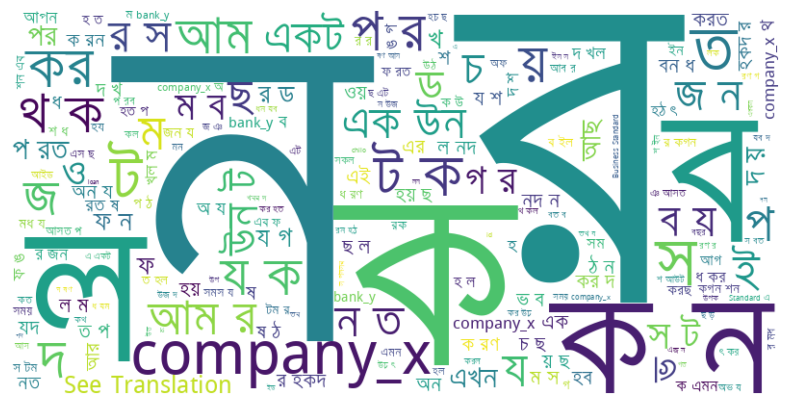

In [10]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
orginal_dataset = pd.read_excel("/content/Dataset-Sentiment Analysis (Task-ML Engineer).xlsx")


bangla_font_path = '/content/Siyamrupali.ttf'

# Combine all text from the 'conversation_text'
text = ' '.join(orginal_dataset['conversation_text'].tolist())

# Generate the word cloud with Bangla font
wordcloud = WordCloud(font_path=bangla_font_path, width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
dataset['conversation_text'] = dataset['conversation_text'].str.replace(r'see translation|translation', '', case=False, regex=True)

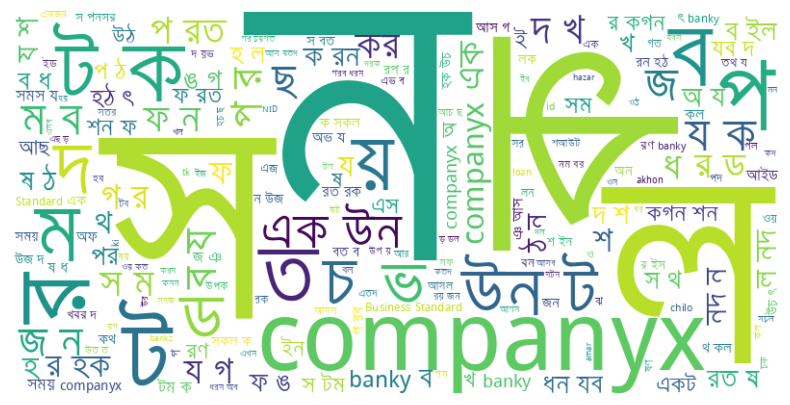

In [12]:
bangla_font_path = '/content/Siyamrupali.ttf'
text = ' '.join(dataset['conversation_text'].tolist())
wordcloud = WordCloud(font_path=bangla_font_path, width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [13]:
# Getting unique value count for 'sentiment' column
unique_sentiment_count = dataset['sentiment'].value_counts()
unique_sentiment_count

,count
sentiment,
neutral,45
negative,42
positive,12


In [14]:
dataset

,conversation_text,sentiment
0,companyx এজেন্ট রং নাম্বারে টাকা ফেরত নেওয় উপা...,neutral
1,companyx গ্রাহক খুব দুঃখ জনক এক খবর…… মোবাইল ন...,negative
2,companyx গ্রাহক খুব দুঃখ জনক এক খবর…… মোবাইল ন...,negative
3,banky ব্যাংক ঘোষনা কার্ড ক্যাশ উত্তোলন তেমনি স...,negative
4,banky ব্যাংক ঘোষনা কার্ড ক্যাশ উত্তোলন তেমনি স...,negative
...,...,...
94,bankk ব্যাংক ভিসা কার্ড companyx একাউন্টে এড ম...,negative
95,এক companyx নাম্ব এন আই ডি নাম্ব কি,neutral
96,খুবইজরুরীHelpপ্লিজ মোবাইলে companyx অ্যাপস করত...,negative
97,companyx সেভিংস বাতিল দিন টাকা পাওয়া টাকা Cash...,neutral


In [15]:
dataset.to_csv("/content/Preprocess_dataset.csv")

### **Now Applying SMOTE to preproecess dataset**

In [16]:
import numpy as np
import pandas as pd
from gensim.models.fasttext import load_facebook_vectors
import os
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import urllib.request
import gzip
import shutil

fasttext_url = "https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.bn.300.bin.gz"
fasttext_model_path = "/content/cc.bn.300.bin"
compressed_model_path = "/content/cc.bn.300.bin.gz"

# Function to download and extract the FastText model
def download_and_extract_fasttext_model():
    if not os.path.exists(compressed_model_path):
        print("Downloading the Bangla FastText model...")
        urllib.request.urlretrieve(fasttext_url, compressed_model_path)
        print("Download completed.")


    if not os.path.exists(fasttext_model_path):
        try:
            print("Extracting the FastText model...")
            with gzip.open(compressed_model_path, 'rb') as f_in:
                with open(fasttext_model_path, 'wb') as f_out:
                    shutil.copyfileobj(f_in, f_out)
            print("Model extracted.")
        except EOFError:

            print("Error: Corrupted compressed file. Re-downloading...")
            os.remove(compressed_model_path)
            download_and_extract_fasttext_model()

if not os.path.exists(fasttext_model_path):
    download_and_extract_fasttext_model()

# Load the pre-trained FastText model in binary format
print("Loading the FastText model...")
ft_model = load_facebook_vectors(fasttext_model_path)


file_path = "/content/Preprocess_dataset.csv"
dataset = pd.read_csv(file_path)

# Function to get FastText embeddings for a sentence
def get_sentence_embedding(sentence):
    words = sentence.split()  # Tokenize the sentence
    word_embeddings = [ft_model[word] for word in words if word in ft_model]  # Get word vectors
    if len(word_embeddings) > 0:
        return np.mean(word_embeddings, axis=0)  # Average of word vectors for sentence
    else:
        return np.zeros(ft_model.vector_size)  # Return zero vector if no words found in FastText


dataset['fasttext_embedding'] = dataset['conversation_text'].apply(get_sentence_embedding)

# Convert the embeddings and target column to numpy arrays
X = np.vstack(dataset['fasttext_embedding'].values)  # Feature matrix
y = dataset['sentiment'].values  # Target labels

#Apply train-test split 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original dataset class distribution:", Counter(y_train))
print("Resampled dataset class distribution after SMOTE:", Counter(y_train_smote))


print(dataset[['conversation_text', 'fasttext_embedding']].head())


Download completed.
Extracting the FastText model...
Model extracted.
Loading the FastText model...
Original dataset class distribution: Counter({'negative': 32, 'neutral': 29, 'positive': 8})
Resampled dataset class distribution after SMOTE: Counter({'negative': 32, 'positive': 32, 'neutral': 32})
                                   conversation_text  \
0  companyx এজেন্ট রং নাম্বারে টাকা ফেরত নেওয় উপা...   
1  companyx গ্রাহক খুব দুঃখ জনক এক খবর…… মোবাইল ন...   
2  companyx গ্রাহক খুব দুঃখ জনক এক খবর…… মোবাইল ন...   
3  banky ব্যাংক ঘোষনা কার্ড ক্যাশ উত্তোলন তেমনি স...   
4  banky ব্যাংক ঘোষনা কার্ড ক্যাশ উত্তোলন তেমনি স...   

                                  fasttext_embedding  
0  [-0.0027222496, 0.015597997, 0.0075965812, 0.0...  
1  [0.0016707618, 0.0006324652, 0.009130371, 0.01...  
2  [0.0016707618, 0.0006324652, 0.009130371, 0.01...  
3  [0.013028299, -0.014432782, -0.006914518, 0.01...  
4  [0.013028299, -0.014432782, -0.006914518, 0.01...  


### **Just training and testing on Preprocessed SMOTE dataset**


Classification Report for SVM:

              precision    recall  f1-score   support

    negative       0.44      0.80      0.57        10
     neutral       0.75      0.56      0.64        16
    positive       0.00      0.00      0.00         4

    accuracy                           0.57        30
   macro avg       0.40      0.45      0.40        30
weighted avg       0.55      0.57      0.53        30


Classification Report for Logistic Regression:

              precision    recall  f1-score   support

    negative       0.43      0.90      0.58        10
     neutral       0.83      0.31      0.45        16
    positive       1.00      0.75      0.86         4

    accuracy                           0.57        30
   macro avg       0.75      0.65      0.63        30
weighted avg       0.72      0.57      0.55        30


Classification Report for Decision Tree:

              precision    recall  f1-score   support

    negative       0.44      0.70      0.54        10
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report for Random Forest:

              precision    recall  f1-score   support

    negative       0.50      0.90      0.64        10
     neutral       0.75      0.56      0.64        16
    positive       0.00      0.00      0.00         4

    accuracy                           0.60        30
   macro avg       0.42      0.49      0.43        30
weighted avg       0.57      0.60      0.56        30


Classification Report for KNN:

              precision    recall  f1-score   support

    negative       0.45      0.90      0.60        10
     neutral       0.80      0.25      0.38        16
    positive       0.40      0.50      0.44         4

    accuracy                           0.50        30
   macro avg       0.55      0.55      0.48        30
weighted avg       0.63      0.50      0.46        30


Classification Report for Naive Bayes:

              precision    recall  f1-score   support

    negative       0.42      0.80      0.55        10
     neutral

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


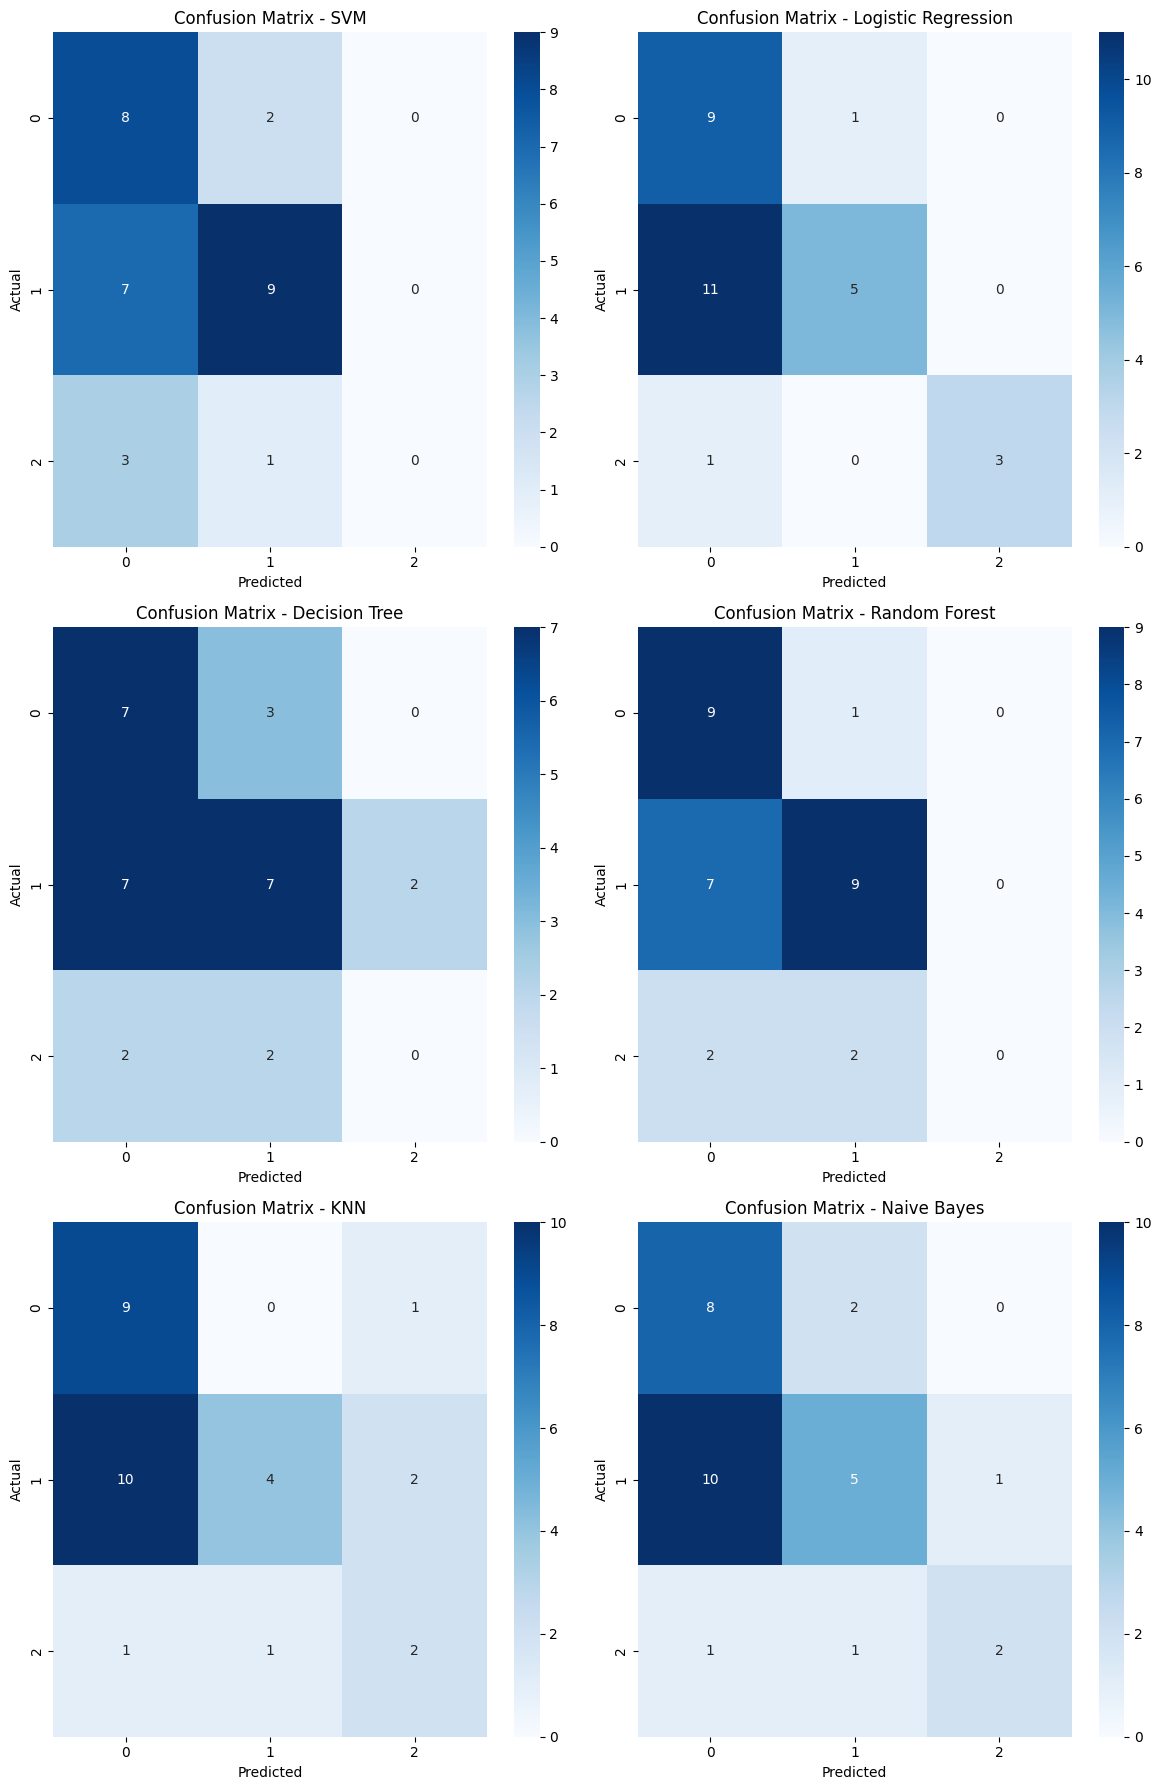

                 Model  Accuracy  F1 Score    Recall
0                  SVM  0.566667  0.533333  0.566667
1  Logistic Regression  0.566667  0.550258  0.566667
2        Decision Tree  0.466667  0.446154  0.466667
3        Random Forest  0.600000  0.557143  0.600000
4                  KNN  0.500000  0.462434  0.500000
5          Naive Bayes  0.500000  0.482321  0.500000


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns



#Define models
models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


results = {}

for name, model in models.items():
    #Train
    model.fit(X_train_smote, y_train_smote)

    #predictions
    y_pred = model.predict(X_test)

    #metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Store the results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'confusion_matrix': cm
    }

    # Print classification report for each model
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

#Confusion Matrice
num_models = len(results)
rows = (num_models + 1) // 2  # This calculates how many rows are needed to fit the models

fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))  # Adjust figure size based on the number of rows
axes = axes.flatten()

for idx, (name, result) in enumerate(results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

# Remove any unused axes
for ax in axes[len(results):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

#Print comparison of accuracy, f1 and recall
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results],
    'F1 Score': [results[model]['f1_score'] for model in results],
    'Recall': [results[model]['recall'] for model in results]
})


print(comparison_df)


### **Applying K fold for limited amount of data**

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


models = {
    "SVM": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5)


results = {}

# Perform cross-validation manually to compute the classification report across all folds
for name, model in models.items():
    print(f"\nEvaluating {name}...\n")

    # Initialize lists to store the true and predicted values for each fold
    y_true_all = []
    y_pred_all = []

    accuracy_scores = []
    f1_scores = []
    recall_scores = []

    # Manual cross-validation loop
    for train_index, val_index in kfold.split(X_train_smote, y_train_smote):
        # Split the data
        X_train_fold, X_val_fold = X_train_smote[train_index], X_train_smote[val_index]
        y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[val_index]

        # Train the model on the fold
        model.fit(X_train_fold, y_train_fold)

        # Predict on the validation set
        y_val_pred = model.predict(X_val_fold)

        # Accumulate true and predicted values across all folds
        y_true_all.extend(y_val_fold)
        y_pred_all.extend(y_val_pred)

        # Calculate performance metrics for this fold
        accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
        f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
        recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))

    # Generate classification report for all folds combined
    final_classification_report = classification_report(y_true_all, y_pred_all)

    # Store the mean scores and final classification report
    results[name] = {
        'model': model,
        'mean_accuracy': np.mean(accuracy_scores),
        'mean_f1_score': np.mean(f1_scores),
        'mean_recall': np.mean(recall_scores),
        'classification_report': final_classification_report  # Final classification report after all folds
    }

    # Print the final classification report for the model
    print(f"Final Classification Report for {name} after Cross-Validation:\n")
    print(final_classification_report)

# Comparison of metrics (Accuracy, F1 Score, Recall)
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Mean Accuracy': [results[model]['mean_accuracy'] for model in results],
    'Mean F1 Score': [results[model]['mean_f1_score'] for model in results],
    'Mean Recall': [results[model]['mean_recall'] for model in results]
})

# Display the comparison dataframe
print("\nModel Performance Comparison (Mean scores across folds):\n")
print(comparison_df)



Evaluating SVM...

Final Classification Report for SVM after Cross-Validation:

              precision    recall  f1-score   support

    negative       0.69      0.78      0.74        32
     neutral       0.74      0.72      0.73        32
    positive       0.97      0.88      0.92        32

    accuracy                           0.79        96
   macro avg       0.80      0.79      0.79        96
weighted avg       0.80      0.79      0.79        96


Evaluating Logistic Regression...

Final Classification Report for Logistic Regression after Cross-Validation:

              precision    recall  f1-score   support

    negative       0.66      0.84      0.74        32
     neutral       0.69      0.56      0.62        32
    positive       0.97      0.88      0.92        32

    accuracy                           0.76        96
   macro avg       0.77      0.76      0.76        96
weighted avg       0.77      0.76      0.76        96


Evaluating Decision Tree...

Final Classifi